In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [14]:
# Load dataset
df = pd.read_csv("heart_disease.csv")

In [15]:

# Step 1: Data Exploration
print("Basic Info:")
df.info()
print("\nFirst 5 rows:")
print(df.head())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1022 non-null   int64  
 1   gender    1022 non-null   int64  
 2   cp        1022 non-null   int64  
 3   trestbps  1022 non-null   int64  
 4   chol      1022 non-null   int64  
 5   fbs       1022 non-null   int64  
 6   restecg   1022 non-null   int64  
 7   thalach   1022 non-null   int64  
 8   exang     1022 non-null   int64  
 9   oldpeak   1022 non-null   float64
 10  slope     1022 non-null   int64  
 11  ca        1022 non-null   int64  
 12  thal      1022 non-null   int64  
 13  target    1022 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 111.9 KB

First 5 rows:
   age  gender  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   52       1   0       125   212    0        1      168      0      1.0   
1   53       1   0       140   203 

In [16]:

# Step 2: Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


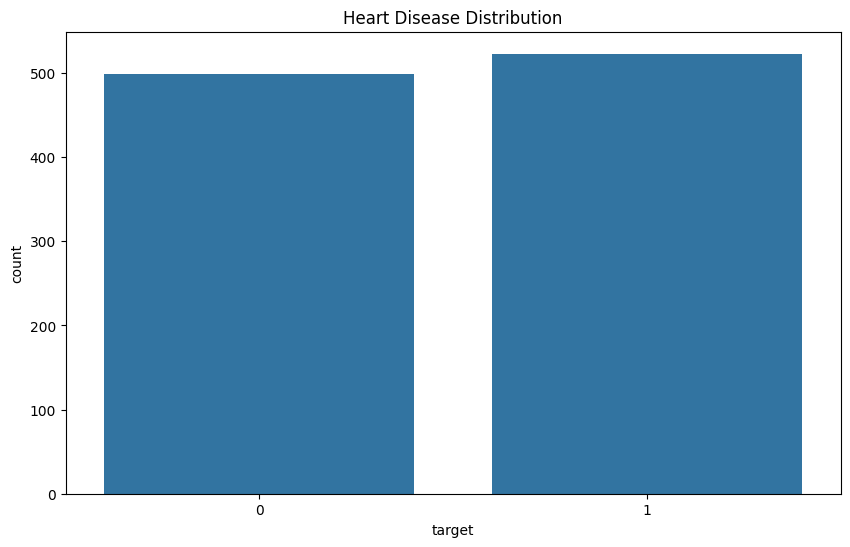

In [17]:

# Step 3: Data Visualization
plt.figure(figsize=(10,6))
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution')
plt.show()

In [18]:

# Step 4: Feature Engineering
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:

# Step 5: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [20]:

# Step 6: Model Evaluation
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.8292682926829268

Confusion Matrix:
[[ 70  28]
 [  7 100]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        98
           1       0.78      0.93      0.85       107

    accuracy                           0.83       205
   macro avg       0.85      0.82      0.83       205
weighted avg       0.84      0.83      0.83       205



In [21]:

# Step 7: Train RandomForest for Feature Importance
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_

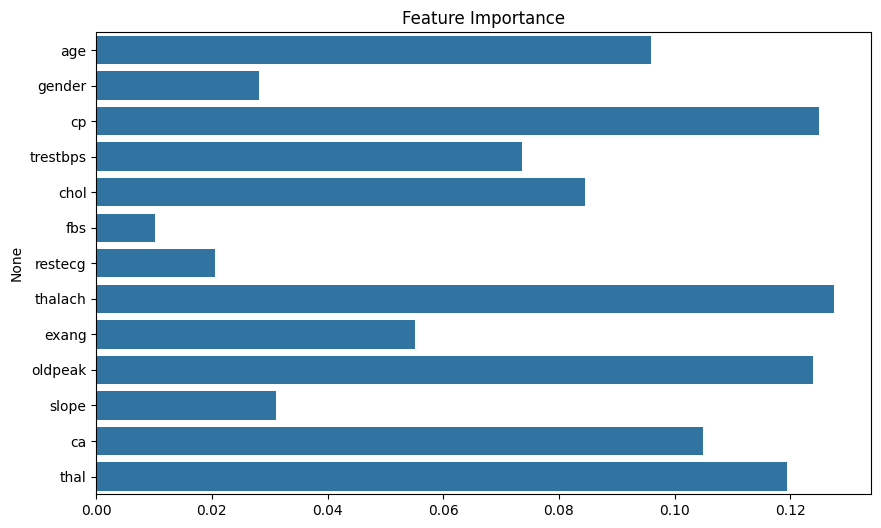

In [22]:

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=X.columns)
plt.title("Feature Importance")
plt.show()